In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import shap

In [2]:
loan_df=pd.read_csv("credit_train.csv")

In [3]:
loan_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
loan_df.shape

(100514, 19)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [6]:
loan_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [7]:
loan_df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [8]:
loan_df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [9]:
loan_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [10]:
loan_df['Loan Status']=loan_df['Loan Status'].map({'Fully Paid':int('1'), "Charged Off":int('0')})

In [11]:
loan_df['Loan Status'].value_counts()

1.0    77361
0.0    22639
Name: Loan Status, dtype: int64

In [12]:
loan_df['Term'].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

In [13]:
loan_df['Term']=loan_df['Term'].map({'Short Term':int('0'), 'Long Term':int('1')})

In [14]:
loan_df['Term'].value_counts()

0.0    72208
1.0    27792
Name: Term, dtype: int64

In [15]:
loan_df['Years in current job'].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

In [16]:
loan_df['Years in current job']=loan_df['Years in current job'].map({'10+ years':int('0'), '2 years':int('1'),
                                                                     '3 years ':int('2'), '< 1 year':int('3'),
                                                                     '5 years ':int('4'), '1 year ':int('5'),
                                                                    '4 years':int('6'), '6 years':int('7'),
                                                                    '7 years':int('8'), '8 years':int('9'),
                                                                    '9 years':int('10')})

In [17]:
loan_df['Years in current job'].value_counts()

0.0     31121
1.0      9134
3.0      8164
6.0      6143
7.0      5686
8.0      5577
9.0      4582
10.0     3955
Name: Years in current job, dtype: int64

In [18]:
loan_df['Home Ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [19]:
loan_df['Home Ownership']=loan_df['Home Ownership'].map({'Home Mortgage':int('0'), 'Rent':int('1'), 'Own Home':int('2')
                                                        , 'HaveMortgage':int('3')})

In [20]:
loan_df['Home Ownership'].value_counts()

0.0    48410
1.0    42194
2.0     9182
3.0      214
Name: Home Ownership, dtype: int64

In [21]:
loan_df['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [22]:
loan_df['Purpose']=loan_df['Purpose'].map({'Debt Consolidation':int('0'), 'other':int('1'),
                                                                     'Home Improvements':int('2'), 'Other':int('1'),
                                                                     'Business Loan':int('3'), 'Buy a Car':int('4'),
                                                                    'Medical Bills':int('5'), 'Buy House':int('6'),
                                                                    'Take a Trip':int('7'), 'major_purchase':int('8'),
                                                                    'small_business':int('9'),'moving':int('10'),
                                          'wedding':int('11'), 'vacation':int('12'), 'Educational Expenses':int('13')
                                          , 'renewable_energy':int('14')})

In [23]:
loan_df['Purpose'].value_counts()

0.0     78552
1.0      9287
2.0      5839
3.0      1569
4.0      1265
5.0      1127
6.0       678
7.0       573
8.0       352
9.0       283
10.0      150
11.0      115
12.0      101
13.0       99
14.0       10
Name: Purpose, dtype: int64

In [24]:
loan_train=loan_df.drop({"Loan ID", "Customer ID","Months since last delinquent"}, axis=1)

In [25]:
loan_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,0.0,709.0,1167493.0,9.0,0.0,2.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,262328.0,0.0,NaN,NaN,0.0,0.0,0.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1.0,99999999.0,0.0,741.0,2231892.0,9.0,2.0,0.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,347666.0,1.0,721.0,806949.0,NaN,2.0,0.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,176220.0,0.0,NaN,NaN,NaN,1.0,0.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [26]:
loan_train.isnull().sum()

Loan Status                    514
Current Loan Amount            514
Term                           514
Credit Score                 19668
Annual Income                19668
Years in current job         26152
Home Ownership                 514
Purpose                        514
Monthly Debt                   514
Years of Credit History        514
Number of Open Accounts        514
Number of Credit Problems      514
Current Credit Balance         514
Maximum Open Credit            516
Bankruptcies                   718
Tax Liens                      524
dtype: int64

In [27]:
loan_train=loan_train.dropna(axis=0)

In [28]:
loan_train.shape

(60046, 16)

In [29]:
loan_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,0.0,709.0,1167493.0,9.0,0.0,2.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,1.0,99999999.0,0.0,741.0,2231892.0,9.0,2.0,0.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
5,0.0,206602.0,0.0,7290.0,896857.0,0.0,0.0,0.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,1.0,217646.0,0.0,730.0,1184194.0,3.0,0.0,0.0,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,1.0,548746.0,0.0,678.0,2559110.0,1.0,1.0,0.0,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0


In [30]:
loan_train.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [31]:
x= loan_train.drop(['Loan Status' ] , axis=1)
y = loan_train['Loan Status'].values

In [32]:
x

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,0.0,709.0,1167493.0,9.0,0.0,2.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,99999999.0,0.0,741.0,2231892.0,9.0,2.0,0.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
5,206602.0,0.0,7290.0,896857.0,0.0,0.0,0.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,217646.0,0.0,730.0,1184194.0,3.0,0.0,0.0,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,548746.0,0.0,678.0,2559110.0,1.0,1.0,0.0,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,244266.0,0.0,714.0,1619047.0,0.0,1.0,0.0,4290.39,21.4,5.0,1.0,132012.0,242660.0,1.0,0.0
99993,44484.0,0.0,717.0,1152426.0,0.0,0.0,9.0,6280.64,21.0,6.0,0.0,961932.0,0.0,0.0,0.0
99995,147070.0,0.0,725.0,475437.0,8.0,2.0,1.0,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99997,103136.0,0.0,742.0,1150545.0,7.0,1.0,0.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [33]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.25 , random_state= 42)

In [34]:
print(x_train.shape , x_test.shape)

(45034, 15) (15012, 15)


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf = DecisionTreeClassifier()

In [37]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred = clf.predict(x_test)

In [39]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7812416733280043


In [41]:
import pickle

In [42]:
pickle.dump(clf,open('model.pk1','wb'))

In [43]:
# compute the SHAP values for the linear model
background = shap.maskers.Independent(x[1:20], max_samples=50)
explainer = shap.Explainer(clf.predict, background)
shap_values = explainer(x[1:20])

In [44]:
print(shap_values[2])

.values =
array([-0.08881579,  0.05427632, -0.02138158,  0.09210526,  0.00657895,
        0.03947368,  0.        ,  0.04605263, -0.00493421, -0.00328947,
       -0.02138158,  0.01151316,  0.04769737,  0.        ,  0.        ])

.base_values =
0.8421052631578947

.data =
array([2.176460e+05, 0.000000e+00, 7.300000e+02, 1.184194e+06,
       3.000000e+00, 0.000000e+00, 0.000000e+00, 1.085508e+04,
       1.960000e+01, 1.300000e+01, 1.000000e+00, 1.221700e+05,
       2.720520e+05, 1.000000e+00, 0.000000e+00])


In [45]:
shap_values.shape

(19, 15)

In [46]:
x_test[1:20].shape

(19, 15)

In [47]:
vals= np.abs(shap_values.values).mean(0)
print(vals)

[0.10162742 0.02657548 0.10543629 0.06613573 0.02025623 0.01696676
 0.00112535 0.03679017 0.0128982  0.0223338  0.00277008 0.02060249
 0.03090374 0.00112535 0.00328947]


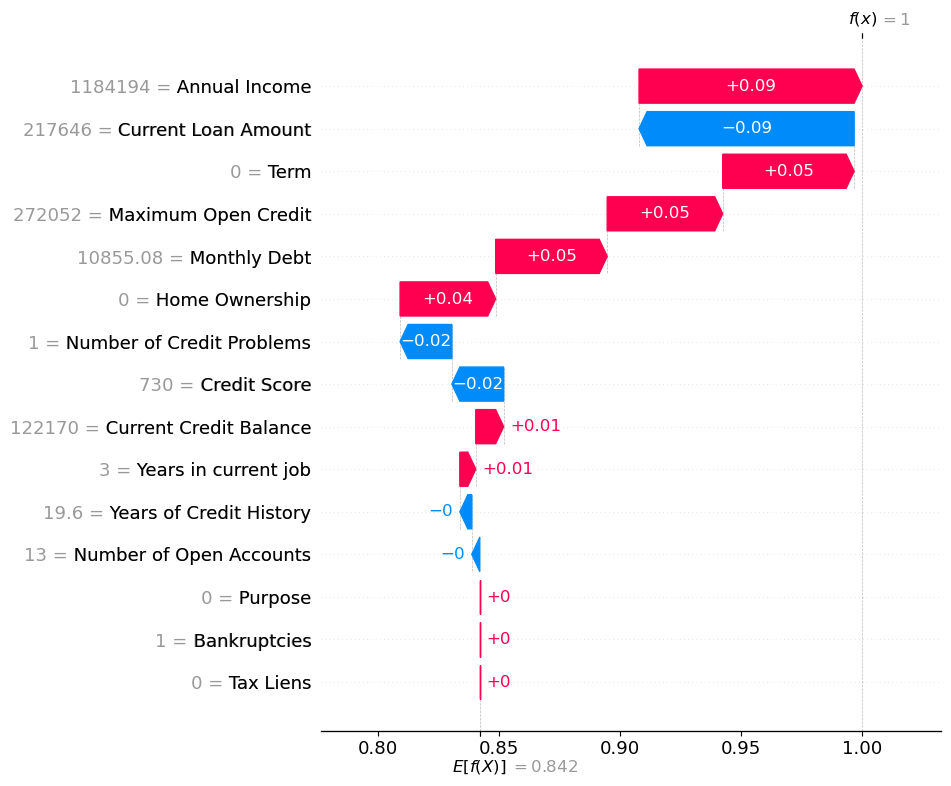

In [48]:
shap.plots.waterfall(shap_values[2], max_display=20)

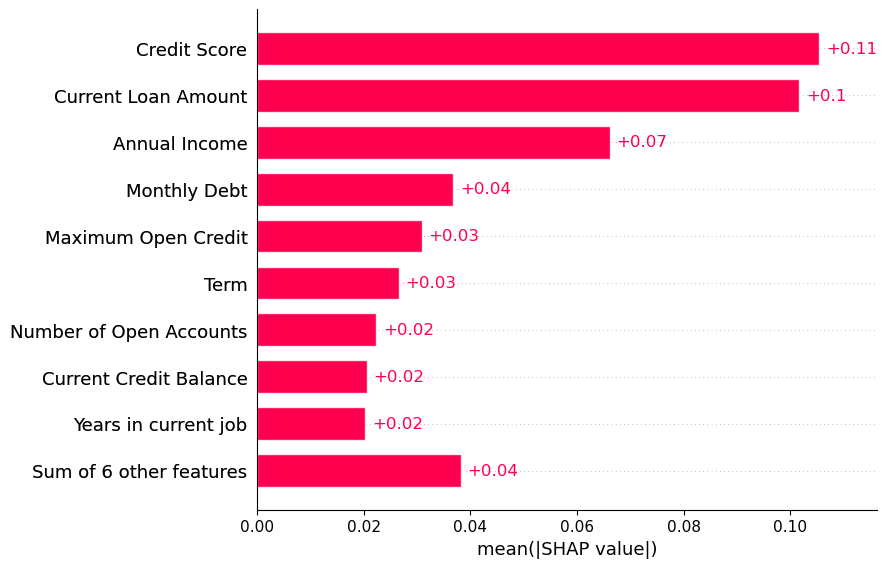

In [49]:
shap.plots.bar(shap_values)


In [ ]:
#sample=pd.DataFrame({'Current Loan Amount':[0],'Term':[0],'Credit Score':[0], 'Annual Income':[0], 'Years in current job':[9], 'Home Ownership':[0], 'Purpose':[0], 'Monthly Debt':[0],'Years of Credit History':[0], 'Number of Open Accounts':[0], 'Number of Credit Problems':[0], 'Current Credit Balance':[0], 'Maximum Open Credit':[0], 'Bankruptcies':[0],'Tax Liens':[0] })

In [ ]:
#a=clf.predict(sample)

In [ ]:
#a

In [ ]:
#compute the SHAP values for the linear model
#background1 = shap.maskers.Independent(sample, max_samples=50)
#explainer1 = shap.Explainer(clf.predict, background1)
#shap_values1 = explainer(sample)

In [ ]:
#shap.plots.waterfall(shap_values1[0], max_display=20)

In [52]:
def predict(value):
  
   sample=pd.DataFrame({'Current Loan Amount':[value["Current Loan Amount"]],'Term':[value["Term"]],'Credit Score':[value["Credit Score"]], 'Annual Income':[value['Annual Income']], 'Years in current job':[value['Years in current job']]
                    , 'Home Ownership':[value['Home Ownership']], 'Purpose':[value['Purpose']], 'Monthly Debt':[value['Monthly Debt']],'Years of Credit History':[value['Years of Credit History']], 
                     'Number of Open Accounts':[value['Number of Open Accounts']]
                    , 'Number of Credit Problems':[value['Number of Credit Problems']], 'Current Credit Balance':[value['Current Credit Balance']], 'Maximum Open Credit':[value['Maximum Open Credit']], 'Bankruptcies':[value['Bankruptcies']],
                     'Tax Liens':[value['Tax Liens']] })
   a=model.predict(sample)
   if a[0] == 0.0 :
        return "You are not eligible for loan"
   else:
     return "You are eligible"

   return a

In [ ]:
import os
from flask import *
from flask import request, render_template
import json
app = Flask(__name__)
model=pickle.load(open('model.pk1','rb'))




@app.route("/", methods=["GET", "POST"])


def home():
    if request.method == "POST":
        data=request.form.to_dict()
        json_data_dump=json.dumps(data)
        json_data=json.loads(json_data_dump)
        print(json_data)
        output = predict(json_data)
        print(output)
        if output:
              return render_template("home.html",index=output)
        
    return render_template("home.html")
            
    

if __name__ == "__main__":
    app.run(host='0.0.0.0', port=1000)


 * Running on all addresses.
 * Running on http://192.168.0.19:1000/ (Press CTRL+C to quit)
192.168.0.19 - - [25/Feb/2023 15:54:09] "GET / HTTP/1.1" 200 -
192.168.0.19 - - [25/Feb/2023 15:54:44] "POST / HTTP/1.1" 200 -


{'Current Loan Amount': '10000', 'Term': '0', 'Credit Score': '200', 'Annual Income': '500000000', 'Years in current job': '5', 'Home Ownership': '0', 'Purpose': '7', 'Monthly Debt': '500', 'Years of Credit History': '5', 'Number of Open Accounts': '2', 'Number of Credit Problems': '0', 'Current Credit Balance': '35', 'Maximum Open Credit': '50000', 'Bankruptcies': '0', 'Tax Liens': '0'}
You are eligible


In [ ]:
#from sklearn.svm import SVC
#svc=SVC(kernel='rbf')
#svc.fit(x_train,np.ravel(y_train,order='C'))

In [ ]:
#svcprediction=svc.predict(x_test)

In [ ]:
#SVC_Accuracy=accuracy_score(svcprediction,y_test)
#print("Accuracy Result:",accuracy_score(y_test,svcprediction))

In [ ]:
# compute the SHAP values for the linear model
#background_SVM = shap.maskers.Independent(x[1:20], max_samples=50)
#explainer_SVM = shap.Explainer(svc.predict, background_SVM)
#shap_values_SVM = explainer_SVM(x[1:20])

In [ ]:
#shap.plots.waterfall(shap_values_SVM[1], max_display=2, show=False)